# Analysis of Pyber ride-sharing statistics 
## Overview
Through the advent of mobile technology, transportation network companies (TNC)–such as Lyft and Uber–have developed and have gained a wide following. These companies have allowed commuters additional and (sometimes) more convenient transportation options. This study aims to look into the ride-sharing statistics of Pyber, a smaller TNC. 

## Method
Python modules Pandas and NumPy were used for data analyses while MatPlotLib and Seaborn were used for data visualisation.

In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

Details of the city coverage and the individual rides were compiled into two .csv files and then merged. Information included in the dataset were the number of drivers, the date of each ride, and the identifier of each ride. A description of each city, including its type and the number of Pyber drivers, were also in the dataset.

Data analyses involved calculations of summary statistics and visualisation into bubble plots and pie charts.

In [1]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_df = pd.merge(city_data, ride_data,on = "city")

# Display the data table for preview
ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Results
### Pyber Reach
Pyber was used in 120 cities, by almost 3000 drivers. During the period covered (January 1 to May 8, 2018), Over 2300 rides were recorded. The cities could be classified into three categories.

In [33]:
# Get the city types and the city names
city_type = ride_df["type"].unique()
city = ride_df["city"].unique()

# Get initial data about the cities
city_count = len(city) # number of cities
city_type_count = len(city_type) # number of city types

# create a groupby object to get summary data
city_grped = ride_df.groupby(["city","type"])

no_rides = city_grped["ride_id"].count() # number of rides per city
ride_count = no_rides.sum()

no_drivers = city_grped["driver_count"].mean() # number of drivers per city
driver_count = no_drivers.sum()

# Summary table
summary = pd.DataFrame({"No. of cities": [city_count],
                        "No. of city types": [city_type_count],
                        "No. of rides": [ride_count],
                        "No. of drivers": [driver_count]})
summary

,No. of cities,No. of city types,No. of rides,No. of drivers
0,120,3,2375,2973


### Trends in Ride-Sharing Data
Prices are a function of supply and demand (https://www.investopedia.com/university/economics/economics3.asp), such that low demand and high supply lead to low prices while high demand and low supply lead to high prices. Pyber fare trends appeared to follow these relationships. For instance, the average fares in rural areas tended to be higher than in suburban and urban areas. Perhaps, people in rural areas had high demand for Pyber's services but the number of drivers is low. In contrast, the fares in the urban areas were lower compared to the rural areas; it could be surmised that there was a lower demand for Pyber services and there were a lot of Pyber drivers plying the urban routes.

The range of average fares was wider in the rural areas than in the suburban and in the urban areas. This suggests that the distances travelled by the Pyber drivers had higher variations than in the urban and in the suburban areas.

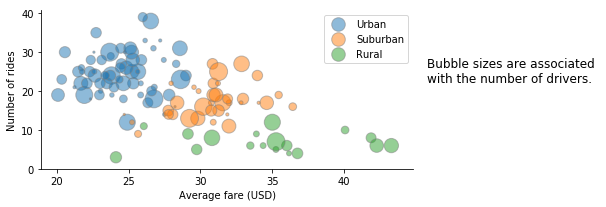

In [36]:
# Obtain the x and y coordinates for each of the three city types

ave_fare = round(city_grped["fare"].mean(),2) # average fare per city

# create new dataframe to contain the data extracted from the groupby object
w = pd.DataFrame({"no_rides": no_rides,
                  "ave_fare": ave_fare,
                  "no_drivers": no_drivers})

w1 = w.reset_index() # to access the grouping variables from the previous groupby
z = no_drivers

labels = list(w1["type"].unique()) # list of city types 

# Plot the bubble plot
fg = seaborn.FacetGrid(data=w1, hue='type', hue_order=labels, aspect = 2)

fg1= fg.map(plt.scatter,"ave_fare", "no_rides",
            s = 5 * z, alpha = 0.5, edgecolor = "grey")

plt.xlabel("Average fare (USD)")
plt.ylabel("Number of rides")
plt.legend() # insert legend
plt.gcf().text(1, 0.6, "Bubble sizes are associated \nwith the number of drivers.", fontsize=12) # annotation

# Save Figure
plt.savefig("Images/bubble.png")
plt.show()

### City Type Distribution
The city coverage of Pyber services were distributed as follows: 55% urban, 30% suburban, and 15% urban. 

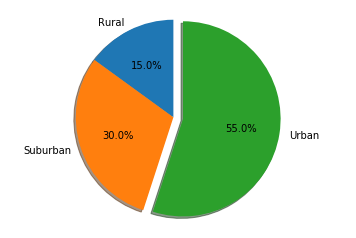

In [4]:
# Group the cities based on type
t = city_grped["fare"].count()
t1 = t.groupby("type")
city_dist = t1.count()

# Pie chart
type_list = sorted(list(city_type))
explode = [0, 0, 0.1]
plt.pie(city_dist, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save plot
plt.savefig("Images/pie_city_count.png")

In [5]:
# Show plot
plt.show()

### Total Fares by City Type
Most of the revenue generated from fares came from the urban Pyber drivers (63%). Though the rural Pyber drivers fetched the highest average fares, their shares are low (7%).

           fare
type           
Rural      6.81
Suburban  30.46
Urban     62.72


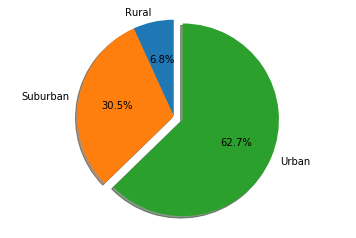

In [6]:
# Calculate Type Percents
tot_fare = city_grped["fare"].sum()
tot_fare1 = tot_fare.reset_index()

tot_fare_gb = tot_fare1.groupby("type")
tot_fare = tot_fare_gb.sum() # sum of fares

pct_fare = round(((tot_fare_gb.sum()/tot_fare_gb.sum().sum()) * 100),2)

print(pct_fare)

# Build Pie Chart
type_list = sorted(list(city_type))
explode = [0, 0, 0.1]
plt.pie(tot_fare, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_fare.png")

In [7]:
# Show Figure
plt.show()

### Total Rides by City Type
The low proportion of fares from the rural Pyber drivers and the high proportion from the urban Pyber drivers could be explained by their respective share in the total number of rides. It was determined that 68% of Pyber's ridership was urban while only 5% was rural.

          ride_id
type             
Rural         125
Suburban      625
Urban        1625


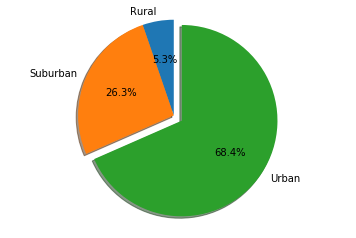

In [34]:
# Calculate Ride Percents
no_rides1 = no_rides.reset_index()
rides_grped = no_rides1.groupby("type")
tot_ride = rides_grped.sum()
print(tot_ride)

# Build Pie Chart
plt.pie(tot_ride, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_ride.png")

In [9]:
# Show Figure
plt.show()

### Total Drivers by City Type
The low shares of rides in the rural area could then be related to the number of Pyber drivers in the rural area. The supply is only about 3% of the roster of Pyber drivers. In contrast, 81% of Pyber drivers were in the urban areas.

          driver_count
type                  
Rural               78
Suburban           490
Urban             2405


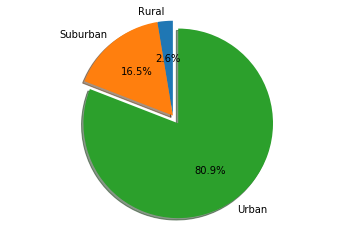

In [31]:
# Calculate Driver Percents
no_drivers1 = no_drivers.reset_index()
driver_grped = no_drivers1.groupby("type")
tot_driver = driver_grped.sum()
print(tot_driver)

# Build Pie Charts
plt.pie(tot_driver, labels = type_list, explode = explode, startangle = 90, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")

# Save Figure
plt.savefig("Images/pie_driver.png")

In [11]:
# Show Figure
plt.show()

## Insights
There is a big opportunity to expand Pyber's operations in the rural areas. The average fares in these areas were relatively higher than in the urban and in the suburban areas primarily because the supply of drivers was low there. In contrast, the majority of Pyber drivers were in the urban areas. The market there appears to be saturated already; the opportunity to get higher fares is rare due to the supply. To increase revenue of Pyber, a possible approach is to increase the number of drivers plying the rural routes while decreasing the number of drivers in the urban zones at any given time. The number of drivers to be reassigned will be calculated based on the supply and demand curves. The aim is to keep the supply of drivers low enough to achieve a demand from commuters and thereby take advantage of the high fares in the rural area while ensuring that urban drivers do not compete among each other for low fares. Further modelling of the data will determine the sweet spot so that the balance will be reached.